In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
from sklearn.datasets import make_classification

In [17]:
...
# define dataset
X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0,
                           n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=1)

In [5]:
from collections import Counter
# summarize class distribution
counter = Counter(y)
print(counter)

Counter({0: 9900, 1: 100})


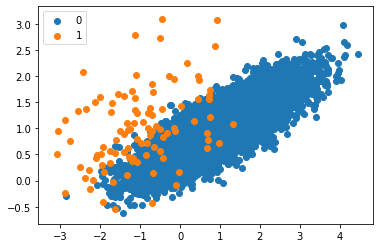

In [6]:
import numpy as np
import matplotlib.pyplot as plt
# scatter plot of examples by class label
for label, _ in counter.items():
    row_ix = np.where(y == label)[0]
    plt.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
plt.legend()
plt.show()

In [7]:
import imblearn

In [9]:
from imblearn.over_sampling import SMOTE

In [10]:
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

In [11]:
counter = Counter(y)
print(counter)

Counter({0: 9900, 1: 9900})


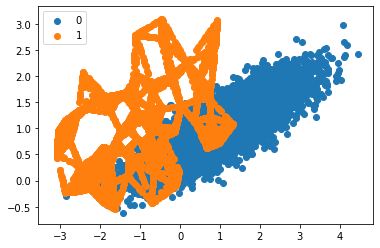

In [12]:
for label, _ in counter.items():
    row_ix = np.where(y == label)[0]
    plt.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
plt.legend()
plt.show()

#### As mentioned in the paper, it is believed that SMOTE performs better when combined with undersampling of the majority class, such as random undersampling.

In [18]:
from imblearn.under_sampling import RandomUnderSampler
over = SMOTE(sampling_strategy=0.1)
under = RandomUnderSampler(sampling_strategy=0.5)

In [19]:
from imblearn.pipeline import Pipeline
steps = [('o',over), ('u',under)]
pipe = Pipeline(steps=steps)

In [20]:
X,y = pipe.fit_resample(X, y)
counter = Counter(y)
print(counter)

Counter({0: 1980, 1: 990})


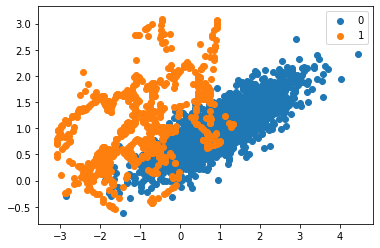

In [21]:
for label, _ in counter.items():
    row_ix = np.where(y == label)[0]
    plt.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
plt.legend()
plt.show()

#### The correct application of oversampling during k-fold cross-validation is to apply the method to the training dataset only, then evaluate the model on the stratified but non-transformed test set.

In [22]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
k_values = [1, 2, 3, 4, 5, 6, 7]
for k in k_values:
	# define pipeline
	model = DecisionTreeClassifier()
	over = SMOTE(sampling_strategy=0.1, k_neighbors=k)
	under = RandomUnderSampler(sampling_strategy=0.5)
	steps = [('over', over), ('under', under), ('model', model)]
	pipeline = Pipeline(steps=steps)
	# evaluate pipeline
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	scores = cross_val_score(pipeline, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
	score = mean(scores)

### Borderline SMOTE

#### A popular extension to SMOTE involves selecting those instances of the minority class that are misclassified, such as with a k-nearest neighbor classification model. We can then oversample just those difficult instances, providing more resolution only where it may be required

Counter({0: 9900, 1: 100})
Counter({0: 9900, 1: 9900})


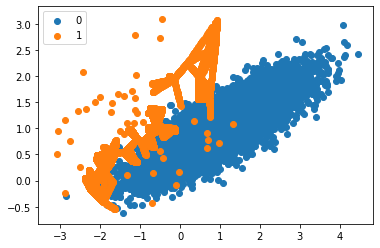

In [24]:
from imblearn.over_sampling import BorderlineSMOTE

X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0,
	n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=1)
# summarize class distribution
counter = Counter(y)
print(counter)
# transform the dataset
oversample = BorderlineSMOTE()
X, y = oversample.fit_resample(X, y)
# summarize the new class distribution
counter = Counter(y)
print(counter)
# scatter plot of examples by class label
for label, _ in counter.items():
	row_ix = np.where(y == label)[0]
	plt.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
plt.legend()
plt.show()

### SVM SMOTE

#### An SVM is used to locate the decision boundary defined by the support vectors and examples in the minority class that close to the support vectors become the focus for generating synthetic examples.

Counter({0: 9900, 1: 100})
Counter({0: 9900, 1: 9900})


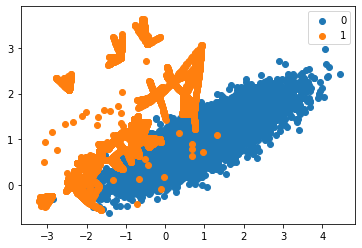

In [25]:
from imblearn.over_sampling import SVMSMOTE

X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0,
	n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=1)
# summarize class distribution
counter = Counter(y)
print(counter)
# transform the dataset
oversample = SVMSMOTE()
X, y = oversample.fit_resample(X, y)
# summarize the new class distribution
counter = Counter(y)
print(counter)
# scatter plot of examples by class label
for label, _ in counter.items():
	row_ix = np.where(y == label)[0]
	plt.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
plt.legend()
plt.show()

### Adaptive Synthetic Sampling (ADASYN)

#### ADASYN is based on the idea of adaptively generating minority data samples according to their distributions: more synthetic data is generated for minority class samples that are harder to learn compared to those minority samples that are easier to learn

Counter({0: 9900, 1: 100})
Counter({0: 9900, 1: 9899})


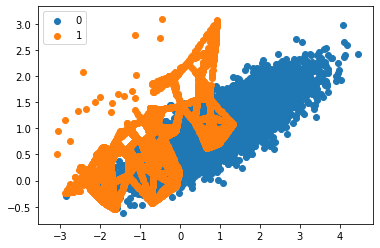

In [26]:
from imblearn.over_sampling import ADASYN

X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0,
	n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=1)
# summarize class distribution
counter = Counter(y)
print(counter)
# transform the dataset
oversample = ADASYN()
X, y = oversample.fit_resample(X, y)
# summarize the new class distribution
counter = Counter(y)
print(counter)
# scatter plot of examples by class label
for label, _ in counter.items():
	row_ix = np.where(y == label)[0]
	plt.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
plt.legend()
plt.show()